<a href="https://colab.research.google.com/github/Shahed04ml/DS372-team10/blob/main/E%26A_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("data.csv",encoding="ISO-8859-1")
olist_customers_dataset=pd.read_csv("olist_customers_dataset.csv", encoding="cp1252")

In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [7]:
print(olist_customers_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [8]:
print(data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [9]:
print(olist_customers_dataset.describe())


       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [10]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
print(olist_customers_dataset.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [12]:
data['CustomerID'] = data['CustomerID'].fillna(method="ffill")

/tmp/ipython-input-1436294710.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['CustomerID'] = data['CustomerID'].fillna(method="ffill")


In [13]:
print(data.duplicated().sum())

5268


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
print(olist_customers_dataset.duplicated().sum())

0


In [16]:
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

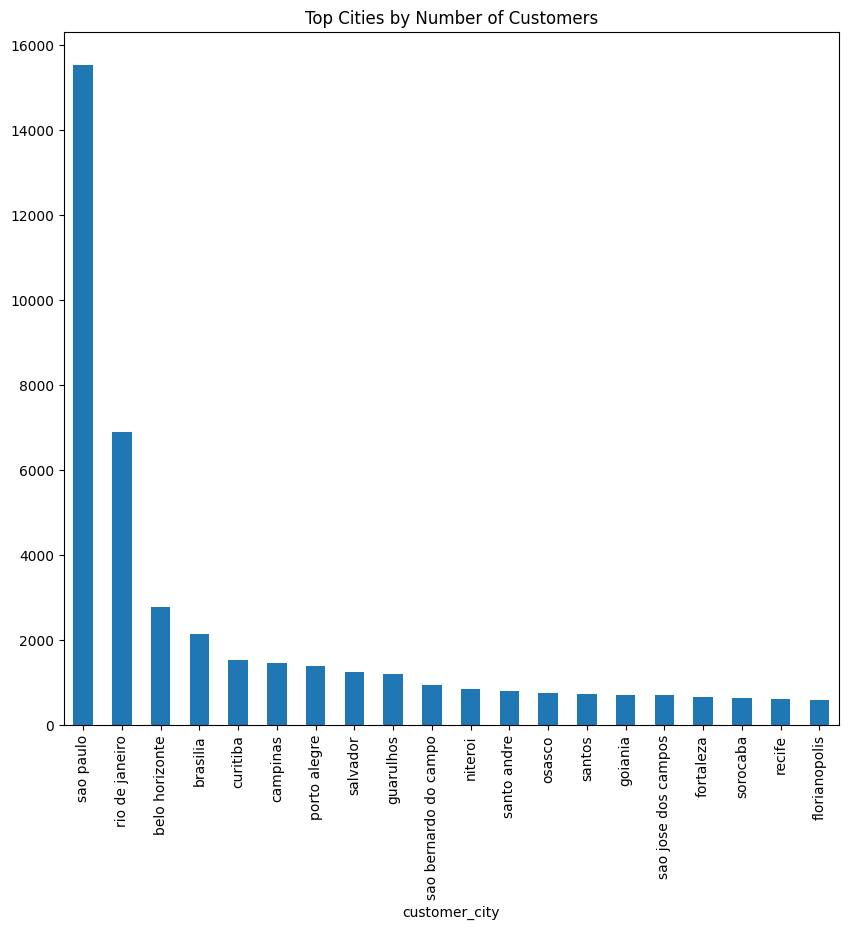

In [17]:
plt.figure(figsize=(10,9))
olist_customers_dataset['customer_city'].value_counts().head(20).plot(kind='bar')
plt.title("Top Cities by Number of Customers")
plt.show()

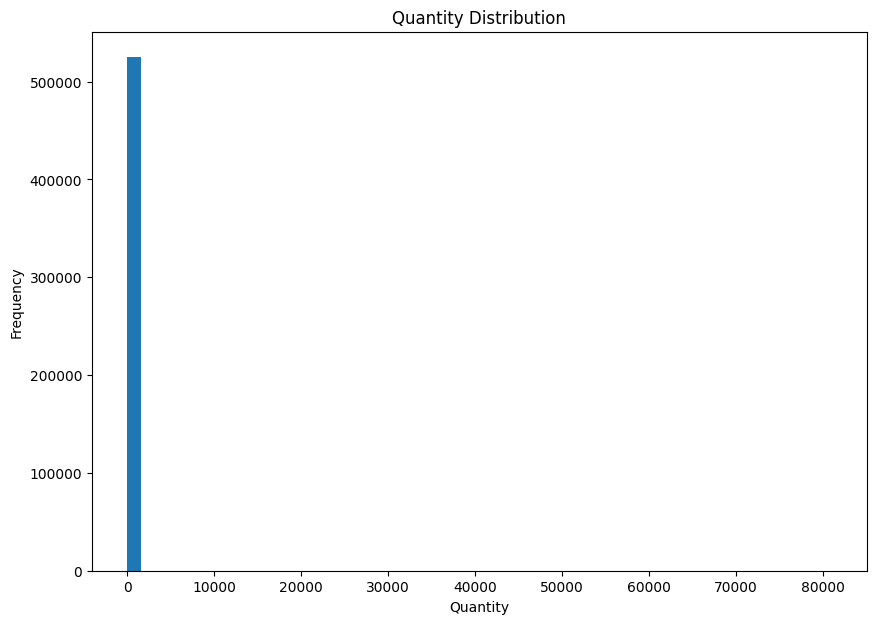

In [18]:
data = data[data['Quantity'] > 0]
plt.figure(figsize=(10, 7))
plt.hist(data['Quantity'], bins=50)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

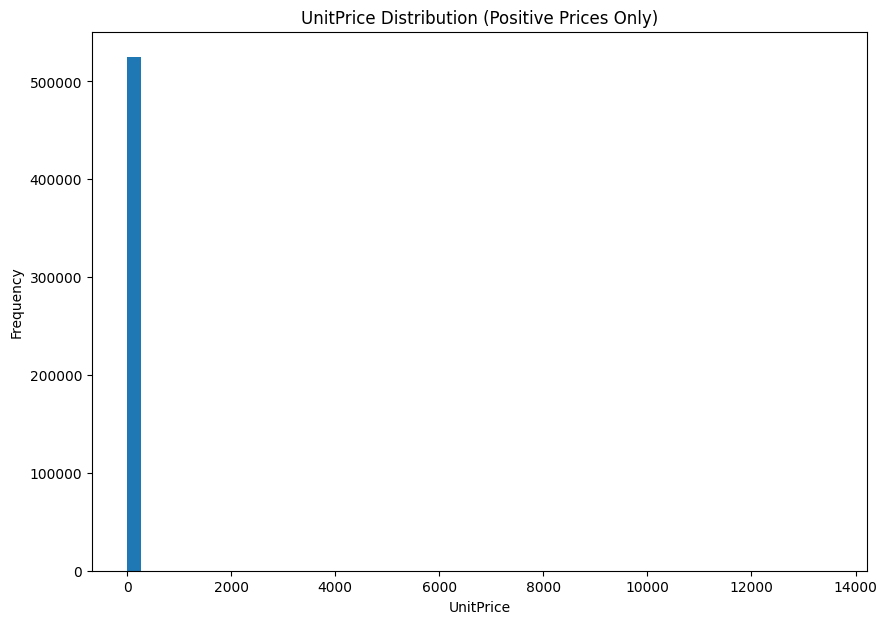

In [19]:
plt.figure(figsize=(10, 7))
plt.hist(data['UnitPrice'], bins=50)
plt.title("UnitPrice Distribution (Positive Prices Only)")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.show()

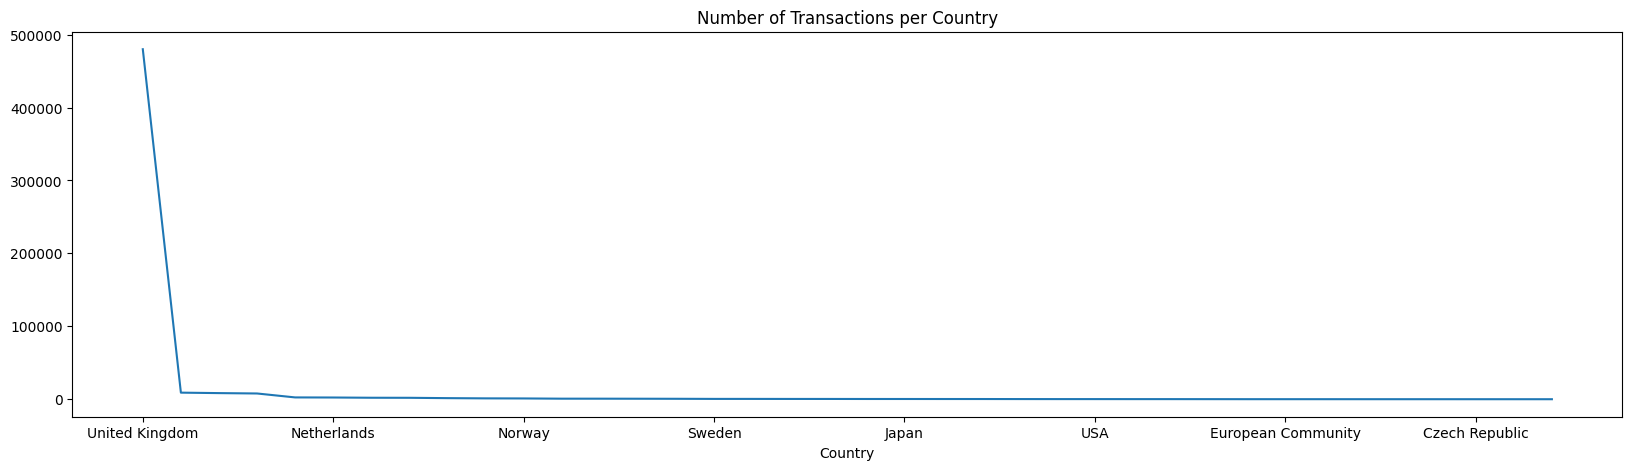

In [20]:
plt.figure(figsize=(20,5))
data['Country'].value_counts().plot(kind='line')
plt.title("Number of Transactions per Country")
plt.show()

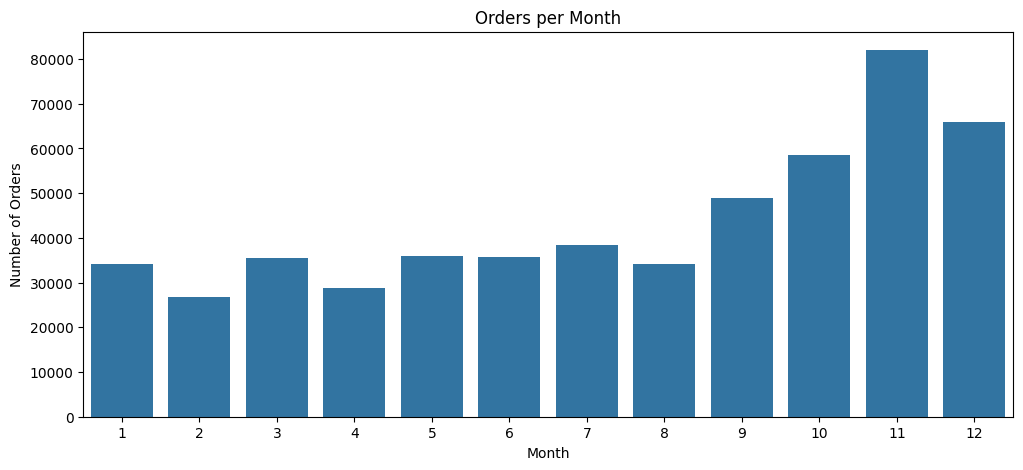

In [21]:
data['Month'] = data['InvoiceDate'].dt.month

plt.figure(figsize=(12,5))
sns.countplot(x=data['Month'])
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

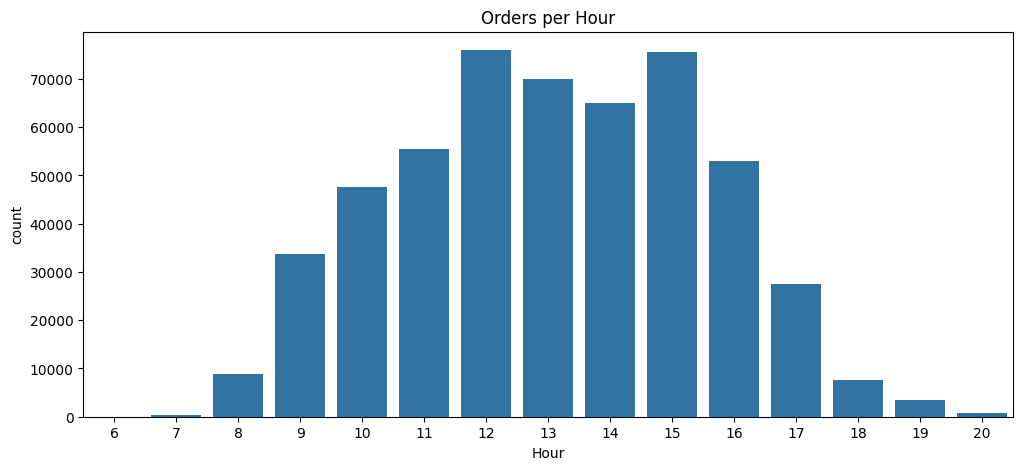

In [22]:
# Hourly trend
data['Hour'] = data['InvoiceDate'].dt.hour
plt.figure(figsize=(12,5))
sns.countplot(x=data['Hour'])
plt.title("Orders per Hour")
plt.show()

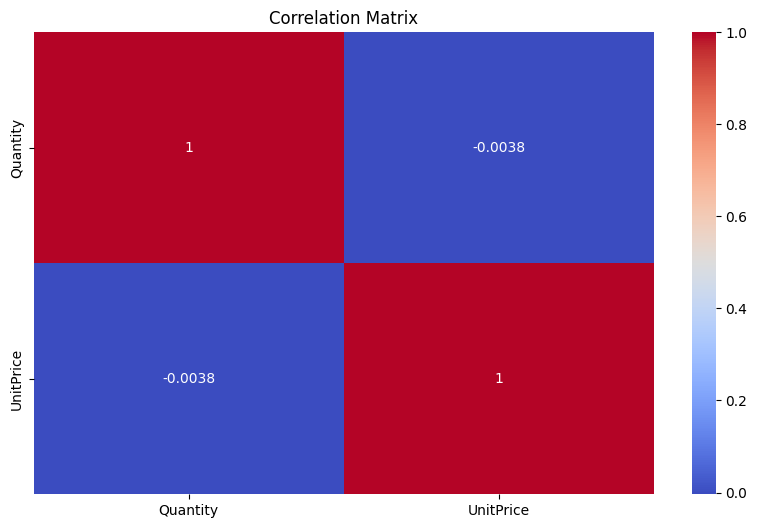

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data[['Quantity','UnitPrice']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()